In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu 
import numpy as np
from collections import Counter

In [2]:
# functions
def remove_undesired_lengths(sequ, lower, upper):
    new = []
    for seq in sequ:
        if len(seq) > lower and len(seq) < upper:
            new.append(seq)
    return new


# functions
def length_list(sequ):
    output = []
    for seq in sequ:
        output.append(len(seq))
    return output


def get_chars(sequ):
    char = []
    for seq in sequ:
        for c in seq:
            if c not in char:
                char.append(c)
    return char


def list_all_values_df(frame, culumn):
    all_values = []
    for value in frame[culumn]:
        if value not in all_values:
            all_values.append(value)
    return all_values


def remove_after_character_in_df(frame, column, char):
    frame[column] = frame[column].apply(lambda text: text.split(char)[0])
    
    
def get_amount_values(frame, column, value):
    count = len(frame[frame[column] == value])
    return count


def count_types_column(frame, column, types):
    class_count = {}
    for sort in types:
        count = 0
        for i in frame[column]:
            if sort == i:
                count += 1
        class_count[sort] = count
    return class_count


In [3]:
# importing data into a DF
with open('C:/Users/loekd/OneDrive/Documenten/SearchTable-2024-02-06 12_24_08.532.tsv', 'r') as file:
    df = pd.read_csv(file, sep='\t')
print(f'with duplicates {len(df)}')
df = df.drop_duplicates(subset=['CDR3'])
print(f'Without duplicates {len(df)}')


with duplicates 84388
Without duplicates 63662


In [4]:
# to make graph of length distributions
# Extract the string for TRA
TRA_seq = []
for index, row in df.iterrows():
    if row['Gene'] == 'TRA':
        TRA_seq.append(row['CDR3'])

# extracting strings for TRB
TRB_seq = []
for index, row in df.iterrows():
    if row['Gene'] == 'TRB':
        TRB_seq.append(row['CDR3'])

# to get list of sequence lengths
TRA_seq_len = length_list(TRA_seq)
TRB_seq_len = length_list(TRB_seq)
complete = TRA_seq_len + TRB_seq_len

# Create a histogram
# Count the occurrences of each length
length_counts = Counter(complete)

# Convert the result into a DataFrame
lengths_general_df = pd.DataFrame({'Length': list(length_counts.keys()), 'Occurrences': list(length_counts.values())})

ax = sns.barplot(data=lengths_general_df, x='Length', y='Occurrences')
plt.xlabel('Length')
plt.ylabel('Occurrences')
for i in ax.containers:
    ax.bar_label(i,)
plt.savefig('plots/lengthdistibution.png', bbox_inches='tight')
plt.close()

# making pie chart of 
TRX_amount = {'TCR type': ['TRA', 'TRB'], 'Sequence length': [len(TRA_seq), len(TRB_seq)]}
TRX_df = pd.DataFrame(TRX_amount)

# Create the bar plot
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(TRX_df['Sequence length'], labels=TRX_df['TCR type'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
# Adjusting label and percentage font sizes for this plot only
for text in texts + autotexts:
    text.set_fontsize(50)  # Adjust font size for labels and percentage values
plt.savefig('plots/TRATRB_amount.png', bbox_inches='tight')
plt.close()


# to print total amount of sequences between 10 and 20 AA
TRA_cut = remove_undesired_lengths(TRA_seq, 10, 20)
print(f'Amount TRA {len(TRA_cut)}')
TRB_cut = remove_undesired_lengths(TRB_seq, 10, 20)
print(f'Amount TRB {len(TRB_cut)}')

Amount TRA 24140
Amount TRB 37900


In [5]:
#to get all mhc classes 
remove_after_character_in_df(df, 'MHC A', '*')
remove_after_character_in_df(df, 'MHC B', '*')
# show all type of MHC classes
MHC_classes = list_all_values_df(df, 'MHC class')
print(f'general MHC : {MHC_classes}')
# subtypes in A
A_subtype = list_all_values_df(df, 'MHC A')
B_subtype = list_all_values_df(df, 'MHC B')
print(f'MHC A: {A_subtype}')
print(f'MHC B: {B_subtype}')

print(len(A_subtype), len(B_subtype))


general MHC : ['MHCI', 'MHCII']
MHC A: ['HLA-A', 'HLA-B', 'HLA-DRA1', 'HLA-E', 'HLA-C', 'HLA-DRA', 'HLA-DQA1', 'HLA-DPA1', 'HLA-DRB1', 'HLA-DQA', 'HLA-DPA']
MHC B: ['B2M', 'HLA-DRB1', 'HLA-DRB3', 'HLA-DQB1', 'HLA-DRB5', 'HLA-DPB1', 'HLA-DRA', 'HLA-DPB']
11 8


In [6]:

# Make barplot of all mhc 1 vs mhc2
MHC_1_count = get_amount_values(df, 'MHC class', 'MHCI')
MHC_2_count = get_amount_values(df, 'MHC class', 'MHCII')
MHC_count = pd.DataFrame({'MHC class I': [MHC_1_count], 'MHC class II': [MHC_2_count]})
print(MHC_count)
ax = sns.barplot(data=MHC_count)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xlabel('Class')
ax.set_ylabel('Count')


plt.savefig('plots/MHC_distribution.png', bbox_inches='tight')
plt.close()

   MHC class I  MHC class II
0        60456          3206


In [7]:
# to get barplot of all seperate mhc classes:
A_sub = count_types_column(df, 'MHC A', A_subtype)

A_subtype_count = pd.Series(A_sub)
A_subtype_count = A_subtype_count.sort_index()

ax = sns.barplot(data= A_subtype_count)
for i in ax.containers:
    ax.bar_label(i,)
    
ax.set_yscale('log')
ax.set_xlabel('Type')
ax.set_ylabel('Count (log scale)')

ax.tick_params(labelrotation=45)
plt.savefig('plots/MHCA_subtype_distribution.png', bbox_inches='tight')
plt.close()


In [8]:
# repeat for b
B_sub = count_types_column(df, 'MHC B', B_subtype)

B_subtype_count = pd.Series(B_sub)
B_subtype_count = B_subtype_count.sort_index()
B_subtype_count = B_subtype_count.drop('B2M')

ax = sns.barplot(data= B_subtype_count)
for i in ax.containers:
    ax.bar_label(i,)
    
ax.set_yscale('log')
ax.set_xlabel('Type')
ax.set_ylabel('Count (log scale)')

ax.tick_params(labelrotation=45)

plt.savefig('plots/MHCB_subtype_distribution.png', bbox_inches='tight')
plt.close()

Average TRA: 13.752478388452692, average TRB: 14.533061075850588
p-value: 0.0, statistic: 374314294.5


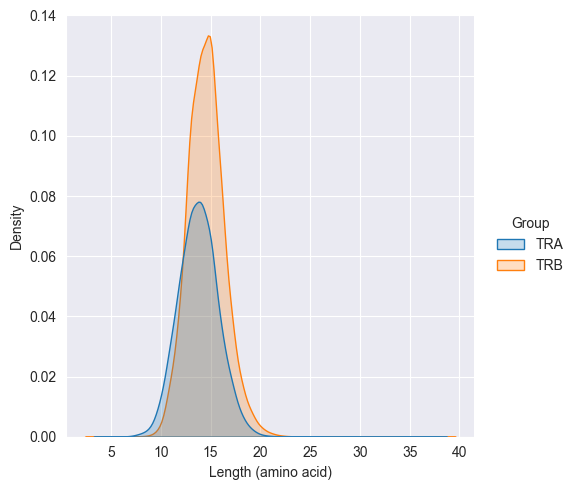

In [9]:
# to create a graph to compare average lengths
# Create a DataFrame from the lists
lengths = {'Group': ['TRA'] * len(TRA_seq_len) + ['TRB'] * len(TRB_seq_len),
        'Length': TRA_seq_len + TRB_seq_len}
lengths_df = pd.DataFrame(lengths)
average_TRA = sum(TRA_seq_len) / len(TRA_seq_len)
average_TRB = sum(TRB_seq_len) / len(TRB_seq_len)
print(f'Average TRA: {average_TRA}, average TRB: {average_TRB}')
# Create a boxplot to compare the distributions of lengths between the two groups
sns.displot(data=lengths_df, kind='kde', fill=True, x='Length', hue='Group', bw_method=0.3)
# Perform Mann-Whitney U test to assess the difference in distributions
statistic, p_value = mannwhitneyu(np.array(TRA_seq_len), np.array(TRB_seq_len), alternative='less', method='asymptotic')

plt.xlabel('Length (amino acid)')
plt.ylabel('Density')
plt.savefig('plots/distplot_lengths_mannwhitney.png', bbox_inches='tight')

print(f"p-value: {p_value}, statistic: {statistic}")

In [10]:
# to make a overview of common amino acids at each location 
def count_amino_acids(sequences):
    # Initialize a dictionary to store counts
    counts = {}

    # Iterate through each sequence
    for seq in sequences:
        # Iterate through each position in the sequence
        for i, aa in enumerate(seq):
            # Check if the position is already in the dictionary
            if i not in counts:
                # If not, initialize the count for this position
                counts[i] = {}
            
            # Increment the count for this amino acid at this position
            counts[i][aa] = counts[i].get(aa, 0) + 1
    
    # Convert counts dictionary to a DataFrame
    df = pd.DataFrame(counts).fillna(0).astype(int)

    # Reorder columns by amino acid
    df = df.reindex(sorted(df.columns), axis=1)
    
    # Transpose the DataFrame so that amino acids are in columns
    df = df.transpose()
    return df

# Count amino acids for TRA and TRB
resultA_df = count_amino_acids(TRA_cut)
resultA_df = resultA_df.reindex(sorted(resultA_df.columns), axis=1)

resultB_df = count_amino_acids(TRB_cut)
resultB_df = resultB_df.reindex(sorted(resultB_df.columns), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Creating subplots with 1 row and 2 columns

# Plot for TRA
sns.heatmap(resultA_df, cmap="RdYlBu", annot=False, fmt="d", ax=axes[0])  # Using the first subplot (index 0)
axes[0].set_title('Amino Acid Occurrences at Each Position in TRA')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Amino Acid')

# Plot for TRB
sns.heatmap(resultB_df, cmap="RdYlBu", annot=False, fmt="d", ax=axes[1])  # Using the second subplot (index 1)
axes[1].set_title('Amino Acid Occurrences at Each Position in TRB')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Amino Acid')

plt.savefig('plots/AA_perposition.png', bbox_inches='tight')
plt.close()

In [11]:
# to make a histogram that looks at amino acid type instead
# group definition
aa_groups = {
'electric_positive' : ['R', 'H', 'K',],
'electric_negative' : ['D', 'E'],
'uncharged_polar' : ['S', 'T', 'N', 'Q'],
'Hydrophobic' : ['A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W'],
'special' : ['C', 'G', 'P']
}


def count_amino_acids_group(sequences, groups):
    # Initialize a dictionary to store counts
    counts = {}

    # Iterate through each sequence
    for seq in sequences:
        # Iterate through each position in the sequence
        for i, aa in enumerate(seq):
            # Check if the position is already in the dictionary
            if i not in counts:
                # If not, initialize the count for this position
                counts[i] = {}
            
            # Iterate through each group
            for group, acids in groups.items():
                # If the amino acid belongs to the group, increment the count
                if aa in acids:
                    counts[i][group] = counts[i].get(group, 0) + 1
    
    # Convert counts dictionary to a DataFrame
    df = pd.DataFrame(counts).fillna(0).astype(int)

    # Reorder columns by group
    df = df.reindex(sorted(df.columns), axis=1)
    
    # Transpose the DataFrame so that groups are in columns
    df = df.transpose()
    return df

TRA_groups = count_amino_acids_group(TRA_cut, aa_groups)
TRB_groups = count_amino_acids_group(TRB_cut, aa_groups)
TRA_groups= TRA_groups[sorted(TRA_groups.columns)]
TRB_groups= TRB_groups[sorted(TRB_groups.columns)]


In [12]:
#to plot the different groups in a bar plot
print(list(aa_groups.keys()))
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Creating subplots with 1 row and 2 columns

# Plot for TRA
sns.heatmap(TRA_groups, cmap="seismic", annot=False, fmt="d", ax=axes[0])  # Using the first subplot (index 0)
axes[0].set_title('Amino Acid Occurrences at Each Position in TRA')
axes[0].set_xlabel('Amino acid')
axes[0].set_ylabel('position')

# Plot for TRB
sns.heatmap(TRB_groups, cmap="seismic", annot=False, fmt="d", ax=axes[1])  # Using the second subplot (index 1)
axes[1].set_title('Amino Acid Occurrences at Each Position in TRB')
axes[1].set_xlabel('Amino acid')
axes[1].set_ylabel('position')

plt.savefig('plots/AA_pergroup_perposition.png', bbox_inches='tight')
plt.close()

['electric_positive', 'electric_negative', 'uncharged_polar', 'Hydrophobic', 'special']


In [13]:
def calculate_relative_frequency(df):
    # Calculate the sum of absolute frequencies per row
    row_sums = df.sum(axis=1)
    
    # Divide each absolute frequency value by the sum for its respective row
    relative_df = df.div(row_sums, axis=0)
    
    return relative_df
    
TRA_relative = calculate_relative_frequency(resultA_df)
TRB_relative = calculate_relative_frequency(resultB_df)


In [14]:
import logomaker as lg
# Create a new figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Plot TRA_relative on the first subplot
lg.Logo(TRA_relative, ax=axes[0])
axes[0].set_title('TRA', fontsize= 30)

# Plot TRB_relative on the second subplot
lg.Logo(TRB_relative, ax=axes[1])
axes[1].set_title('TRB', fontsize= 30)

# Adjust layout and save the figure
plt.savefig('plots/sequence_logos.png')
plt.close()


In [15]:
# to get epitope species distribution
epitopes_species = list_all_values_df(df, 'Epitope species')
epitopes_species_counts = count_types_column(df, 'Epitope species', epitopes_species)
epitopes_species_counts_df = pd.Series(epitopes_species_counts)
epitopes_species_counts_df = epitopes_species_counts_df.sort_values(ascending=False)
ax = sns.barplot(data=epitopes_species_counts_df, )
for i in ax.containers:
    ax.bar_label(i, label_type='edge', rotation=90) 
    
ax.set_yscale('log')
ax.set_xlabel('Epitope species')
ax.set_ylabel('Count (log scale)')

ax.tick_params(labelrotation=90)
plt.savefig('plots/epitopes_species_distribution.png', bbox_inches='tight')
plt.close()


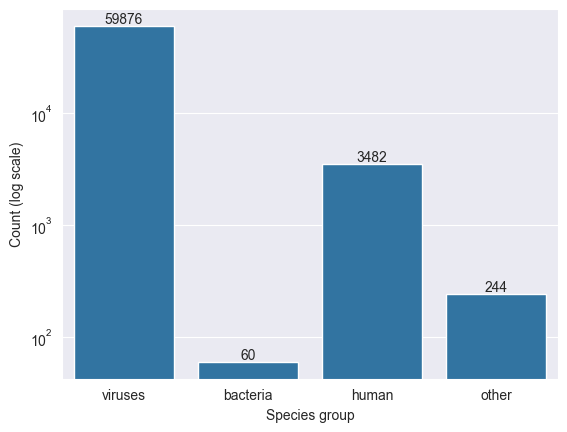

In [16]:
epitope_kind = {
    "viruses": ["AdV", "CMV", "DENV1", "DENV2", "DENV3/4", "EBV", "HCV", "HCoV-HKU1", "HHV", "HIV", "HIV-1", "HIV1", "HPV", "HPV-16", "HSV-2", "HTLV-1", "InfluenzaA", "MCPyV", "SARS-CoV-2", "YFV"],
    "bacteria": ["E.Coli", "PseudomonasAeruginosa", "PseudomonasFluorescens", "StreptomycesKanamyceticus", "M.tuberculosis"],
    "human": ["Homo sapiens", "HomoSapiens"],
    "other": ["synthetic", "SaccharomycesCerevisiae", "SelaginellaMoellendorffii", "TriticumAestivum", "Wheat"]
}
epitope_kind_counts = {}
for key, value in epitope_kind.items():
    counter = 0
    for index, row in df.iterrows():
        if row['Epitope species'] in value:
            counter += 1
    epitope_kind_counts[key] = counter

epitope_kind_counts = pd.DataFrame(epitope_kind_counts.items(), columns=['Species group', 'Counts'])

# Create histogram using Seaborn
ax = sns.barplot(x='Species group', y='Counts', data=epitope_kind_counts)
ax.set_yscale('log')
ax.set_ylabel('Count (log scale)')
for i in ax.containers:
    ax.bar_label(i,)
plt.savefig('plots/epitope_kind.png', bbox_inches='tight')


In [17]:
aa_length = 15
# 
# do a lot of the same for sequence length x
# create a dataframe where only length x is present
data_len15 = df[df['CDR3'].apply(lambda x: len(str(x)) == aa_length)]

TRA_len15 =[]
for index, row in data_len15.iterrows():
    if row['Gene'] == 'TRA':
        TRA_len15.append(row['CDR3'])
        
TRB_len15 = []
for index, row in data_len15.iterrows():
    if row['Gene'] == 'TRB':
        TRB_len15.append(row['CDR3'])
# distributions to validate its the same as total data set
# tra vs trb amount 
print(f'Amount TRA: {len(TRA_len15)} , Amount TRB {len(TRB_len15)}')

Amount TRA: 4425 , Amount TRB 8932


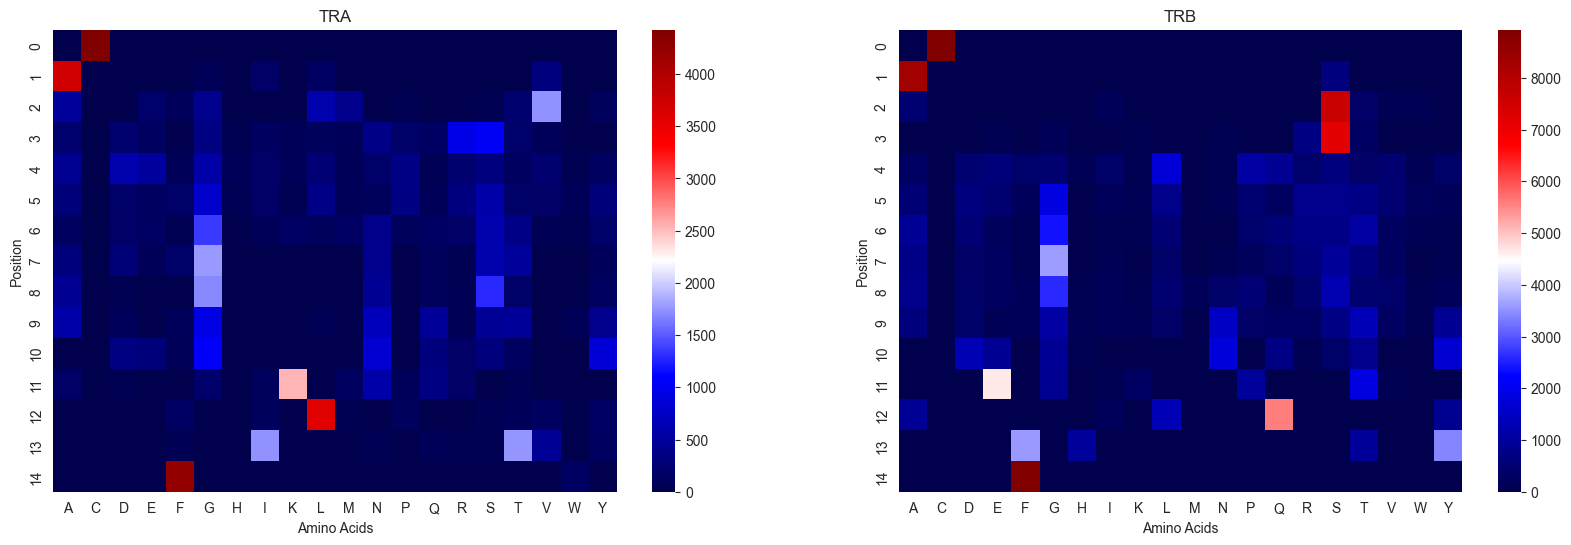

In [20]:
# Make barplot of all mhc 1 vs mhc2
MHC_1_count = get_amount_values(data_len15, 'MHC class', 'MHCI')
MHC_2_count = get_amount_values(data_len15, 'MHC class', 'MHCII')
MHC_count_15 = pd.DataFrame({'MHC class I': [MHC_1_count], 'MHC class II': [MHC_2_count]})

ax = sns.barplot(data=MHC_count_15)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xlabel('class')
ax.set_ylabel('count')
ax.set_title('MHC class distribution')

plt.savefig(f'plots/len{aa_length}_MHC_distribution.png', bbox_inches='tight')
plt.close()

# heatmap of amino acids
# Count amino acids for TRA and TRB per position
resultA_df = count_amino_acids(TRA_len15)
resultA_df = resultA_df.reindex(sorted(resultA_df.columns), axis=1)

resultB_df = count_amino_acids(TRB_len15)
resultB_df = resultB_df.reindex(sorted(resultB_df.columns), axis=1)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Creating subplots with 1 row and 2 columns

# Plot for TRA
sns.heatmap(resultA_df, cmap="seismic", annot=False, fmt="d", ax=axes[0])  # Using the first subplot (index 0)
axes[0].set_title('TRA')
axes[0].set_xlabel('Amino Acids')
axes[0].set_ylabel('Position')

# Plot for TRB
sns.heatmap(resultB_df, cmap="seismic", annot=False, fmt="d", ax=axes[1])  # Using the second subplot (index 1)
axes[1].set_title('TRB')
axes[1].set_xlabel('Amino Acids')
axes[1].set_ylabel('Position')

plt.savefig(f'plots/AA_perposition_len{aa_length}.png', bbox_inches='tight')

# sequence logo
# calculate relative frequency
TRA_len15_count = count_amino_acids(TRA_len15)
TRB_len15_count = count_amino_acids(TRB_len15)
TRA_len15_relative_frequency = calculate_relative_frequency(TRA_len15_count)
TRB_len15_relative_frequency = calculate_relative_frequency(TRB_len15_count)

# Create a new figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Plot TRA_relative on the first subplot
lg.Logo(TRA_len15_relative_frequency, ax=axes[0])
axes[0].set_title('TRA', fontsize= 30)

# Plot TRB_relative on the second subplot
lg.Logo(TRB_len15_relative_frequency, ax=axes[1])
axes[1].set_title('TRB', fontsize= 30)

# Adjust layout and save the figure
plt.savefig(f'plots/sequence_logos_len{aa_length}.png')
plt.close()

# making relative aa heatmaps
TRA_lenX_groups = count_amino_acids_group(TRA_len15_count, aa_groups)
TRB_lenX_groups = count_amino_acids_group(TRB_len15_count, aa_groups)
TRA_lenX_groups= TRA_groups[sorted(TRA_lenX_groups.columns)]
TRB_lenX_groups= TRB_groups[sorted(TRB_lenX_groups.columns)]

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Creating subplots with 1 row and 2 columns

# Plot for TRA
sns.heatmap(TRA_lenX_groups, cmap="seismic", annot=False, fmt="d", ax=axes[0])  # Using the first subplot (index 0)
axes[0].set_title('TRA')
axes[0].set_xlabel('Amino acid groups')
axes[0].set_ylabel('position')

# Plot for TRB
sns.heatmap(TRB_lenX_groups, cmap="seismic", annot=False, fmt="d", ax=axes[1])  # Using the second subplot (index 1)
axes[1].set_title('TRB')
axes[1].set_xlabel('Amino acids groups')
axes[1].set_ylabel('position')

plt.savefig(f'plots/AA_pergroup_perpositionlen{aa_length}.png', bbox_inches='tight')
plt.close()


In [19]:
# graph for V and J gene usage
V_genes = list_all_values_df(df, 'V')
J_genes = list_all_values_df(df, 'J')

print(len(V_genes), len(J_genes))
print(V_genes)
print(J_genes)

106 66
['TRBV20-1*01', 'TRBV5-1*01', 'TRBV10-3*01', 'TRBV4-1*01', 'TRBV6-6*01', 'TRBV15*01', 'TRBV18*01', 'TRBV7-2*01', 'TRBV29-1*01', 'TRBV5-6*01', 'TRBV7-9*01', 'TRBV19*01', 'TRBV27*01', 'TRBV7-7*01', 'TRBV12-4*01', 'TRBV28*01', 'TRBV3-1*01', 'TRBV6-5*01', 'TRBV9*01', 'TRBV4-2*01', 'TRBV30*01', 'TRBV12-3*01', 'TRBV11-1*01', 'TRBV5-5*01', 'TRBV7-8*01', 'TRBV6-1*01', 'TRBV2*01', 'TRBV25-1*01', 'TRBV20-1*02', 'TRBV14*01', 'TRBV11-2*01', 'TRBV11-3*01', 'TRBV7-3*01', 'TRBV6-2*01', 'TRBV24-1*01', 'TRBV7-6*01', 'TRBV10-2*01', 'TRBV5-4*01', 'TRBV4-3*01', 'TRBV13*01', 'TRBV16*01', 'TRAV26-1*01', 'TRAV24*01', 'TRAV26-2*01', 'TRAV19*01', 'TRAV35*01', 'TRAV20*01', 'TRAV29/DV5*01', 'TRAV13-1*01', 'TRAV36/DV7*01', 'TRAV8-2*01', 'TRAV27*01', 'TRAV8-6*01', 'TRAV9-2*01', 'TRAV23/DV6*01', 'TRAV38-2/DV8*01', 'TRAV18*01', 'TRAV8-3*01', 'TRAV22*01', 'TRAV13-2*01', 'TRAV21*01', 'TRAV8-4*01', 'TRAV5*01', 'TRAV12-2*01', 'TRAV38-1*01', 'TRAV12-1*01', 'TRAV1-2*01', 'TRAV39*01', 'TRAV16*01', 'TRAV17*01', 'TRAV